<a href="https://colab.research.google.com/github/jjfj2011/CreditScoring/blob/main/Proyecto_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




La relevancia de mitigar el riesgo crediticio ha llevado a una entidad financiera alemana a explorar soluciones innovadoras. En calidad de científicos de datos, hemos sido solicitados para desarrollar un modelo de machine learning preciso y confiable, capaz de evaluar con mayor exactitud la probabilidad de incumplimiento crediticio de sus clientes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report

Se importan las bibliotecas necesarias para el análisis de datos, visualización y machine learning

#**1. Preprocesamiento de Datos**


---


In [ ]:
# /content/drive/MyDrive/Bootcamp Xperience/2025-02 Febrero/CreditRisk.csv

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bootcamp Xperience/2025-02 Febrero/CreditRisk.csv')
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [ ]:
# Resumen del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4455 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   object
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 487.4+ KB


- Nuestro dataset contiene 4,455 filas y 14 columnas.
- Se muestra 9 columnas numéricas (int64) y 5 columnas categóricas (object)
- No hay valores nulos en ninguna columna

In [ ]:
# Estadísticas del DataFrame
data.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


- Hay valores extremos en 'income', 'assets' y 'debt'
- La distribución de la edad y la antigüedad en el trabajo son razonables
- Las métricas de 'amount' y 'price' muestra que hay una gran variabilidad en los montos solicitados y los precios de los productos.

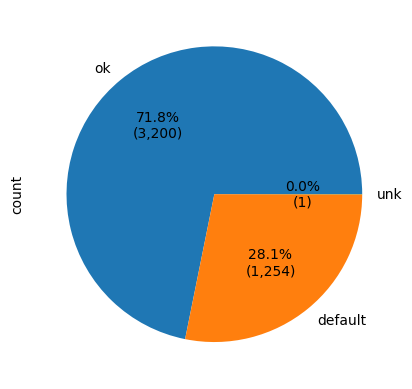

In [ ]:
# data['status'].value_counts()
# data['status'].value_counts().index
# data['status'].value_counts().values

fig, ax = plt.subplots()
ax.pie(
    data['status'].value_counts().values,
    labels=data['status'].value_counts().index,
    autopct=lambda p: '{:.1f}%\n({:,.0f})'.format(p, p * sum(data['status'].value_counts().values) / 100)  # Formato con comas
)
# ax.pie(data['status'].value_counts().values, labels=data['status'].value_counts().index)
ax.set_ylabel('count')

plt.show()

- La categoría "ok" representa el 71.8% del total y tiene 3,200 registros.
- La categoría "default" representa el 28.1% del total y tiene 1,254 registros.
- La categoría "unk" (desconocido) representa solo el 0.0% del total y tiene 1 solo registro

## 1.1 Formato de la columna Default

In [ ]:
data['status'].unique()

array(['ok', 'default', 'unk'], dtype=object)

In [ ]:
data['default'] = np.where(data['status'] == 'default', 1, 0)
data['default'].value_counts()

,count
default,
0,3201
1,1254


Ahora se tiene una forma clara de diferenciar a los clientes en incumplimiento (default = 1) de los que no lo están (default = 0).

## 1.2 Datos anómalos

In [ ]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


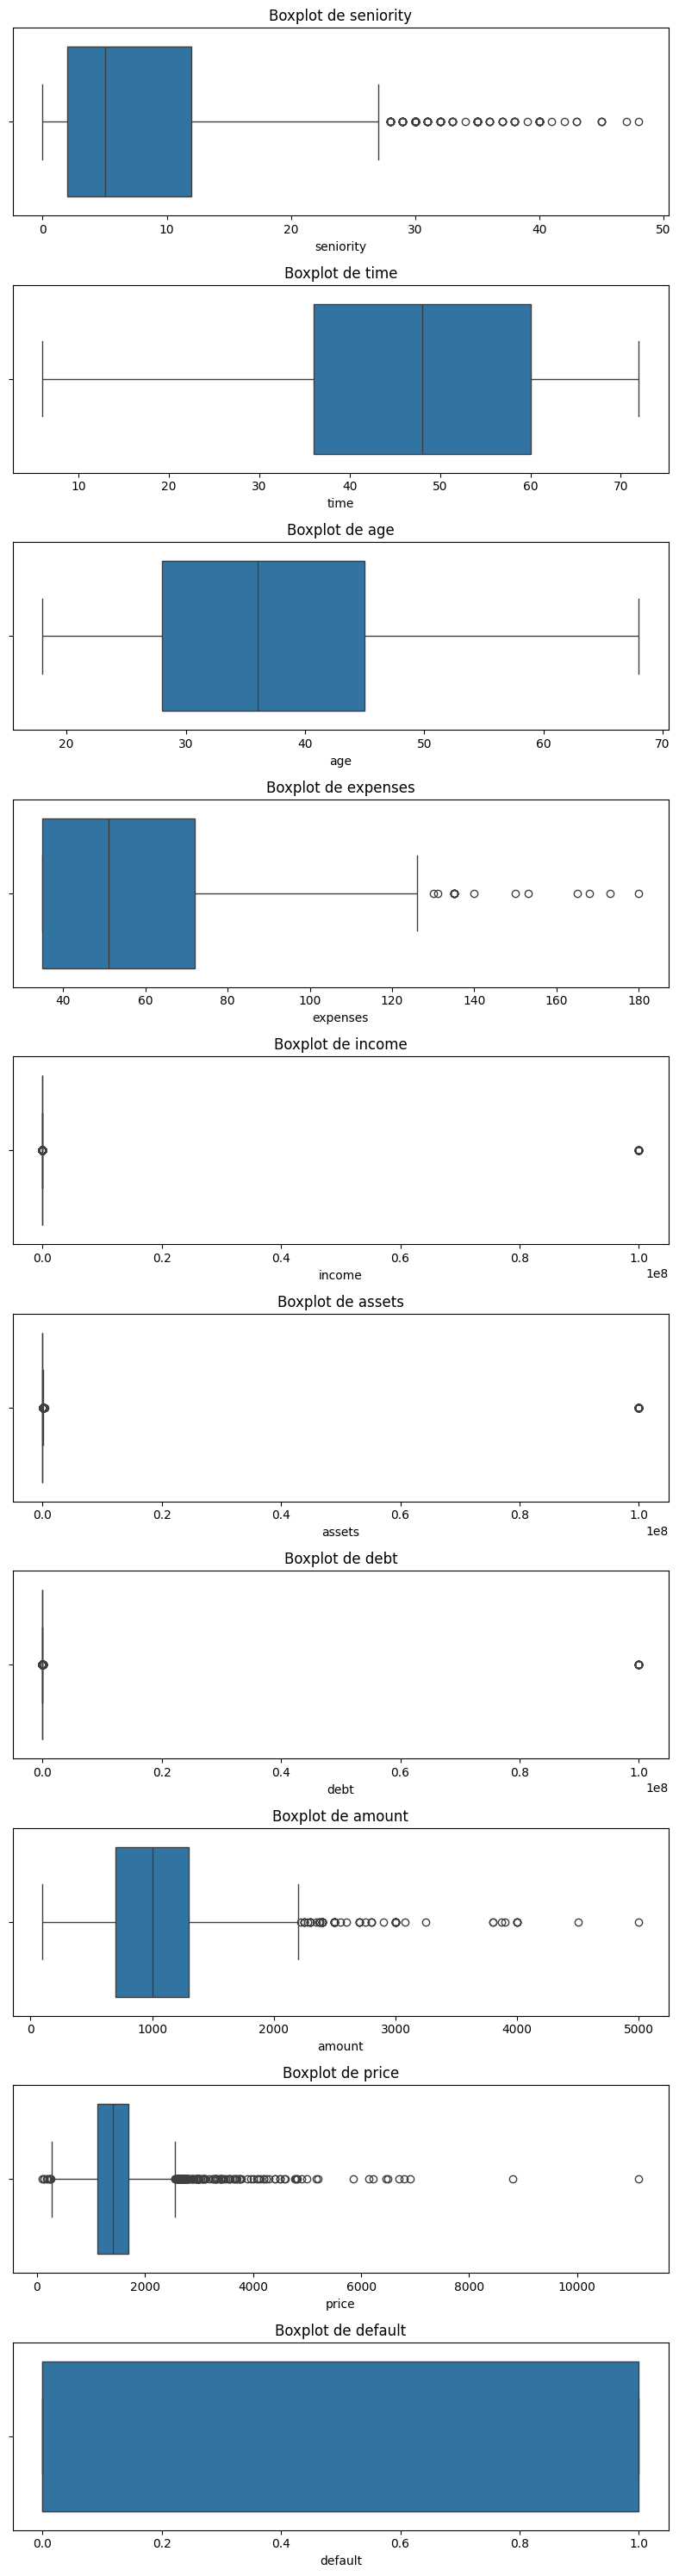

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = data.select_dtypes(include=['number']).columns

# Configurar el tamaño de la figura
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(8, len(numeric_columns) * 3))

# Crear un boxplot para cada variable numérica
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

In [ ]:
t_desc_num = data.describe()
t_desc_num.round(0)

,seniority,time,age,expenses,income,assets,debt,amount,price,default
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0,0.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0,0.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0,0.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0,0.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0,0.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0,1.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0,1.0


Se reemplazan los valores 999999 por valores nulos.

In [ ]:
# Observamos valores anómalos como 99999999 y los reemplzamaos con valores nulos
data.replace(99999999, np.nan, inplace=True)

In [ ]:
data.describe().round(0)

,seniority,time,age,expenses,income,assets,debt,amount,price,default
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0,0.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0,0.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0,0.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0,0.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0,0.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0,1.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0,1.0


1. Income (Ingresos)
- Antes: Máximo de 99,999,999 → Ahora: 959 (mucho más razonable).
- La media bajó drásticamente de ~763,317 a 131
2. Assets (Activos)
- Antes: Máximo de 99,999,999 → Ahora: 300,000.
- Aunque sigue siendo un valor alto, es un valor mucho más creíble.
3. Debt (Deuda)
- Antes: Máximo de 99,999,999 → Ahora: 30,000.
- El nuevo valor máximo es más razonable

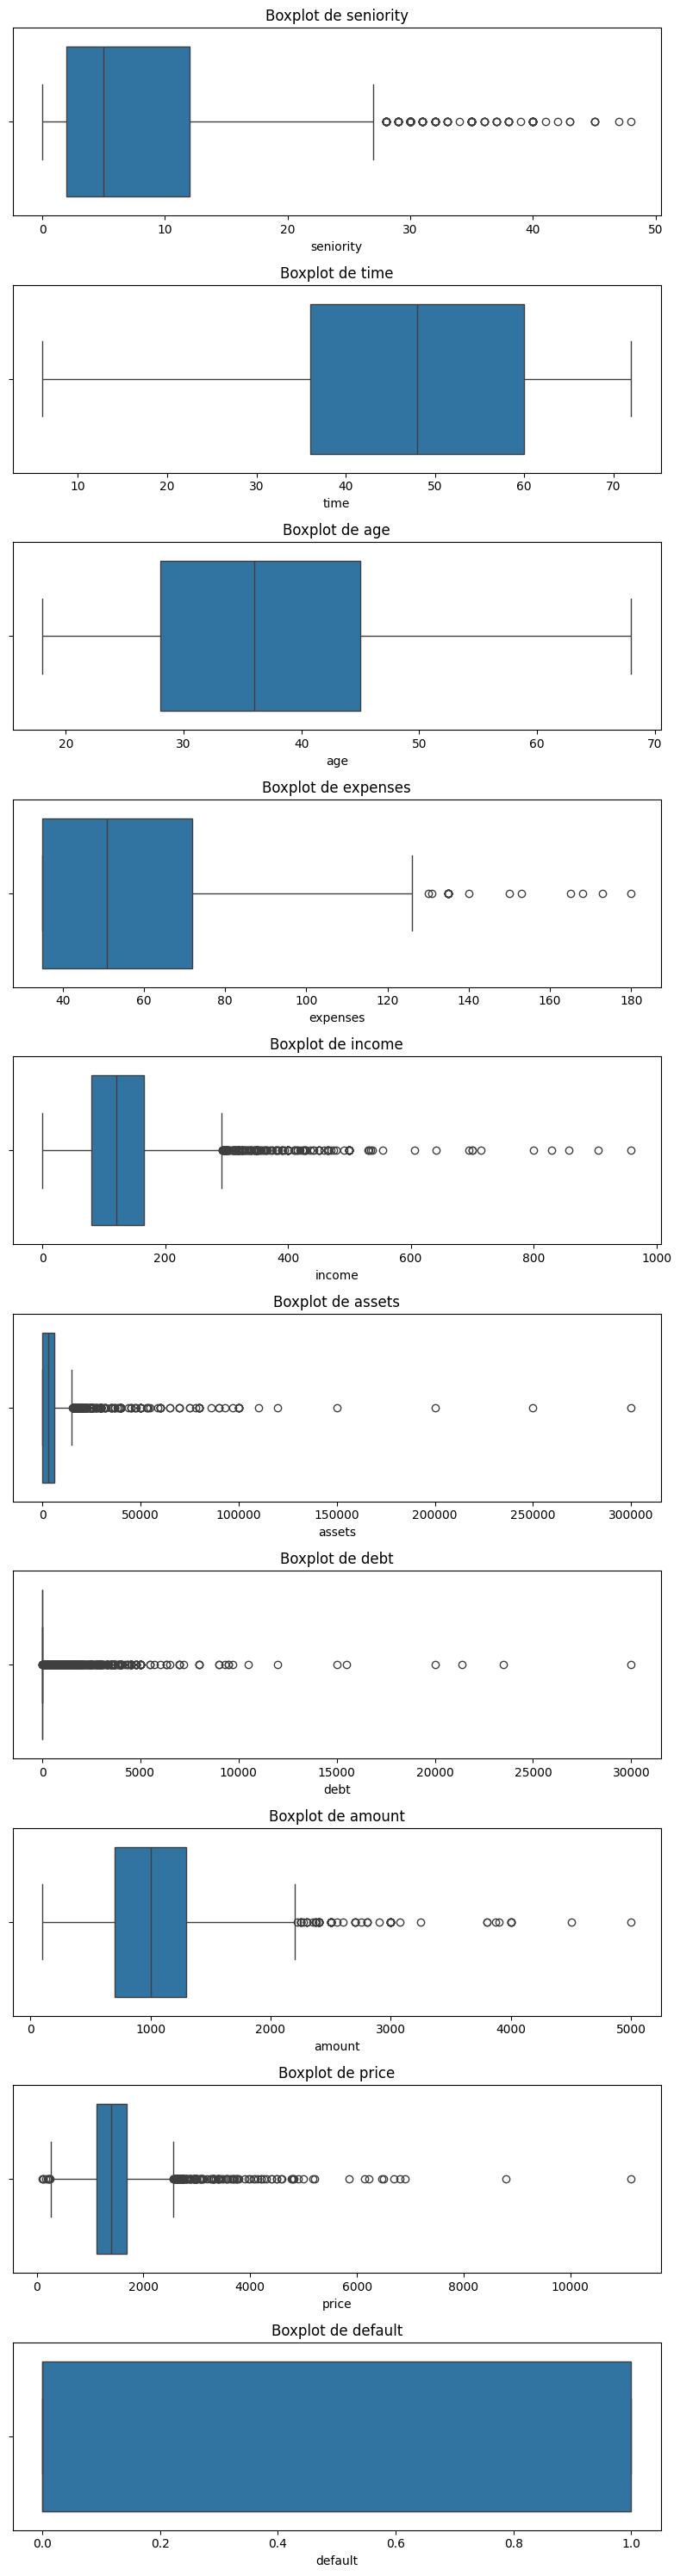

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = data.select_dtypes(include=['number']).columns

# Configurar el tamaño de la figura
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(8, len(numeric_columns) * 3))

# Crear un boxplot para cada variable numérica
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

## 1.3 Imputando Datos

In [ ]:
data.isnull().sum()

,0
status,0
seniority,0
home,0
time,0
age,0
marital,0
records,0
job,0
expenses,0
income,34


Se tiene valores nulos en tres columnas clave:
- income (Ingresos) → 34 valores nulos
- assets (Activos) → 47 valores nulos
- debt (Deuda) → 18 valores nulos

In [ ]:
# Imputar los valores faltantes con la mediana de cada columna
data['income'] = data['income'].fillna(data['income'].median())
data['assets'] = data['assets'].fillna(data['assets'].median())
data['debt'] = data['debt'].fillna(data['debt'].median())

- Reemplazamos los valores nulos por la mediana de cada columna

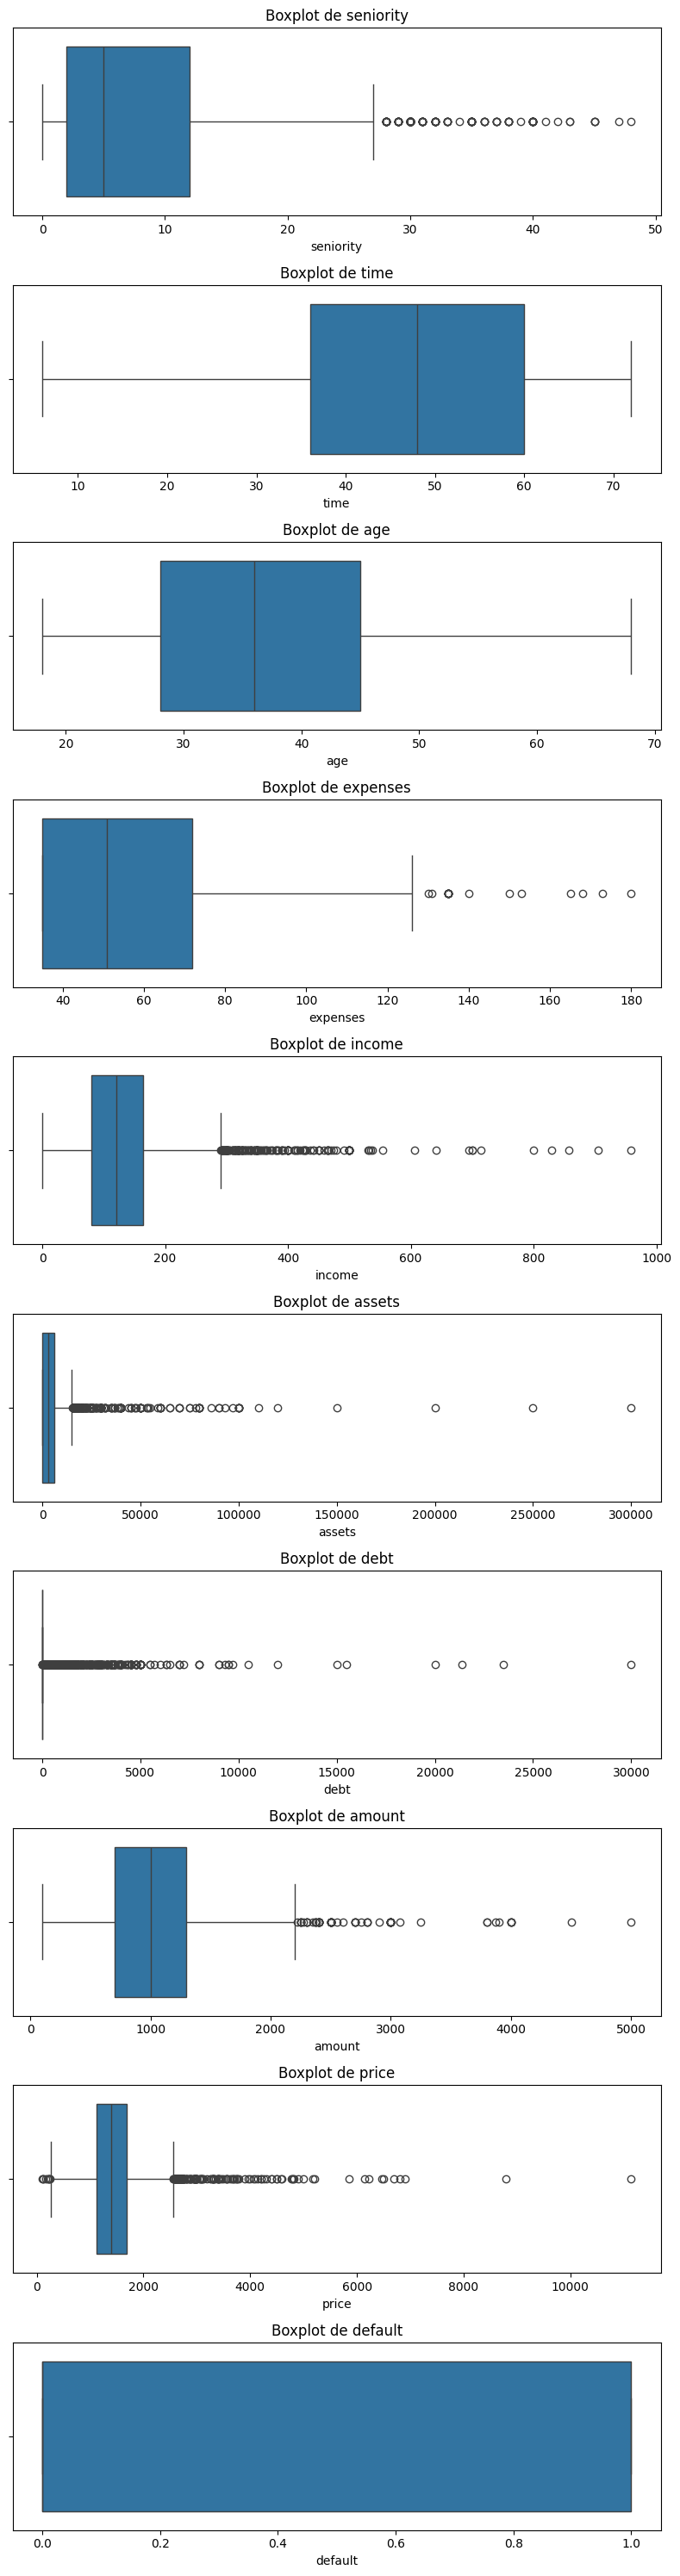

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = data.select_dtypes(include=['number']).columns

# Configurar el tamaño de la figura
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(8, len(numeric_columns) * 3))

# Crear un boxplot para cada variable numérica
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

##1.4 Descriptivos Numéricos

In [ ]:
t_desc_num.columns

Index(['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price', 'default'],
      dtype='object')

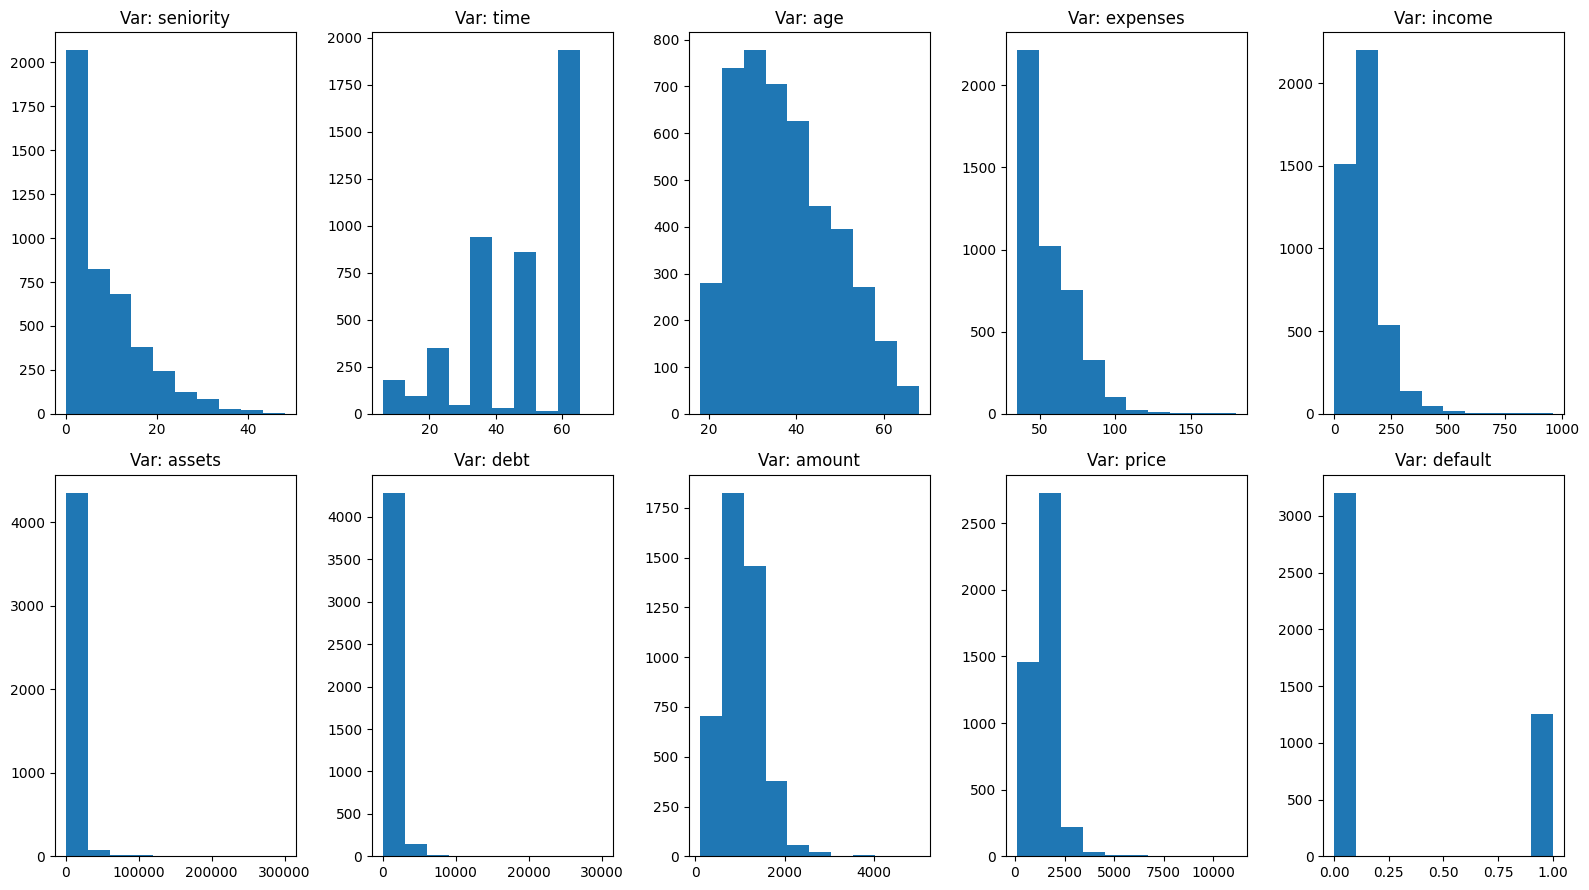

In [ ]:
numerics = t_desc_num.columns

fig, ax = plt.subplots(2, 5, figsize=(16,9))
i = 0
for row in range(2):
  for col in range(5):
    if i < len(numerics) : # Evitar errores si hay menos de 10 columnas
      ax[row, col].hist(data[numerics[i]])
      # ax[row, col].hist(data[numerics[i]], edgecolor='black', alpha=0.7)
      ax[row, col].set_title("Var: " + numerics[i])
      i += 1
    else:
      ax[row, col].axis('off') # Ocultar ejes si no hay más columnas para graficar

plt.tight_layout()
plt.show()

- Seniority, expenses, income, assets, debt y amount: Distribuciones muy sesgadas a la derecha (valores extremos).
- Assets y debt: Posible problema con valores extremadamente grandes o una gran cantidad de ceros.
- Default: Desbalance de clases (muchos valores en 0 y pocos en 1).

In [ ]:
data.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price',
       'default'],
      dtype='object')

## 1.5 Truncando valores atípicos

In [ ]:
trunc = {'expenses':0.99, 'income':0.99, 'assets':0.99, 'debt':0.99, 'amount':0.99, 'price':0.99}

In [ ]:
for var, lim in trunc.items():
  print(var, lim)

expenses 0.99
income 0.99
assets 0.99
debt 0.99
amount 0.99
price 0.99


In [ ]:
for var, lim in trunc.items():
  print(var, np.percentile(data[var], lim * 100))

expenses 106.46000000000004
income 428.9200000000001
assets 50000.0
debt 4773.000000000002
amount 2500.0
price 3559.46


In [ ]:
for var, lim in trunc.items():
  threshold = np.percentile(data[var], lim * 100) # Calcula el precentil 99 de la columna
  data[var] = np.where(data[var] > threshold, threshold, data[var]) # Trunca valores atípicos

  print(f"Se trunca {var} en {threshold:.2f}")  # Imprime el umbral de truncamiento

Se trunca expenses en 106.46
Se trunca income en 428.92
Se trunca assets en 50000.00
Se trunca debt en 4773.00
Se trunca amount en 2500.00
Se trunca price en 3559.46


- Aplicamos el truncamiento al percentil 99 para manejar los valores atípicos en algunas variables.
- Esto ayuda a reducir el impacto de valores extremos sin eliminarlos completamente.

## 1.6 Descriptivos Cualitativos

In [ ]:
cuali = data.select_dtypes('object')
cuali.describe()

,status,home,marital,records,job
count,4455,4455,4455,4455,4455
unique,3,7,6,2,5
top,ok,owner,married,no,fixed
freq,3200,2107,3241,3682,2806


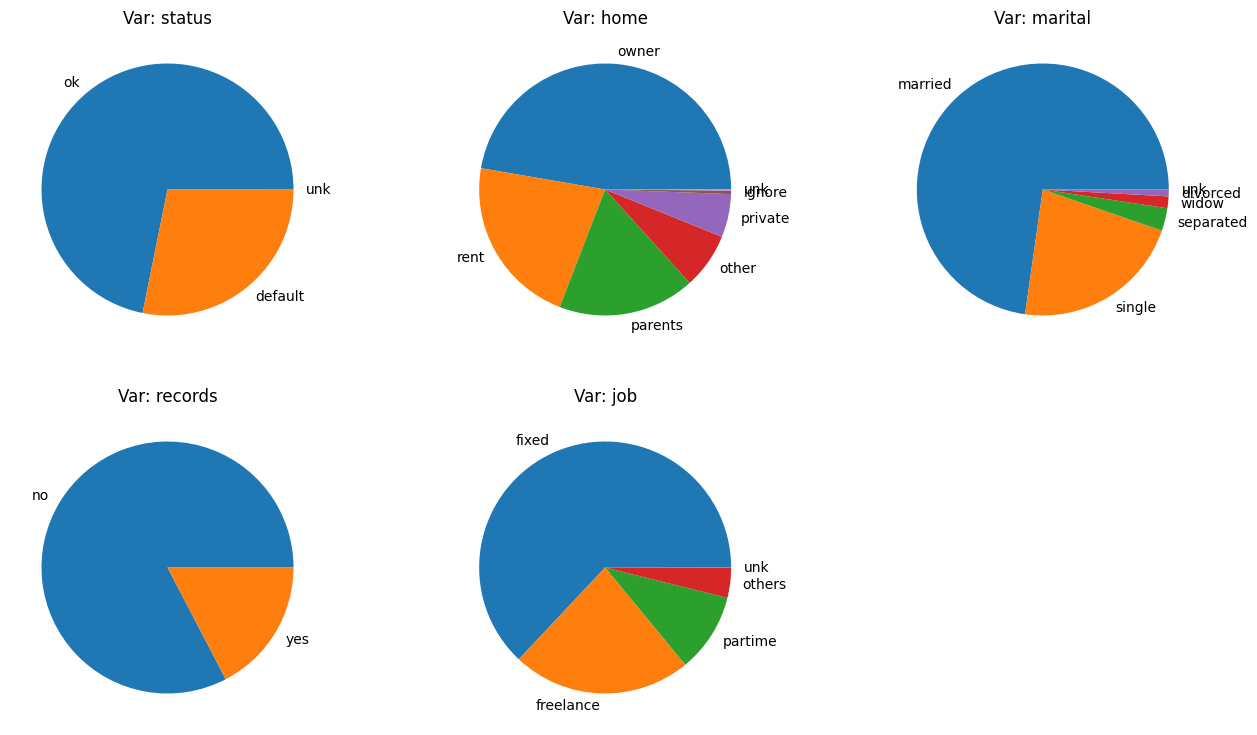

In [ ]:
cualis = cuali.columns

fig, ax = plt.subplots(2, 3, figsize=(16,9))
i = 0
for row in range(2):
  for col in range(3):
    if i < len(cualis): # Evitar errores si hay menos de 6 columnas
      ax[row, col].pie(data[cualis[i]].value_counts().values, labels=data[cualis[i]].value_counts().index)
      ax[row, col].set_title('Var: ' + cualis[i])
      i += 1
    else:
      ax[row, col].axis('off') # Ocultar ejes si no hay más columnas para graficar

plt.show()

1. status (Estado del cliente)
- La mayoría de los clientes están en estado "ok".
- Un porcentaje menor está en "default" (incumplimiento de pagos).
- "unk" sugiere valores desconocidos o nulos.
2. home (Situación de vivienda)
- La mayoría de los clientes son propietarios (owner).
- Otros alquilan (rent) o viven con sus padres (parents).
- Hay categorías menos frecuentes como private, other, e ignore.
3. marital (Estado civil)
- Predomina la categoría married (casado).
- single (soltero) es la segunda más frecuente.
- widow, separated, divorced y unk tienen menor representación.
4. records (Historial financiero)
- La mayoría de los clientes no tienen antecedentes financieros(no).
- Un grupo más pequeño tiene algún tipo de registro financiero (yes).
5. job (Tipo de empleo)
- fixed (empleo fijo) es el más común.
- freelance y partime (medio tiempo) tienen una representación menor.
- unk y others indican datos desconocidos o categorías atípicas.

## 1.7 Reagrupando categorías

In [ ]:
freq_home = data['home'].value_counts()
freq_home

,count
home,
owner,2107
rent,973
parents,783
other,319
private,247
ignore,20
unk,6


Las categorías poco representativas

In [ ]:
threshold = 0.05 * len(data)  # Umbral del 5% del total de datos
low_freq = freq_home[freq_home < threshold].index  # Categorías poco representativas
print(low_freq)

Index(['ignore', 'unk'], dtype='object', name='home')


In [ ]:
data['home'] = data['home'].replace(low_freq, 'other')
data['home'].value_counts()

,count
home,
owner,2107
rent,973
parents,783
other,345
private,247


In [ ]:
freq_marital = data['marital'].value_counts()
freq_marital

,count
marital,
married,3241
single,978
separated,130
widow,67
divorced,38
unk,1


Las categorías poco representativas

In [ ]:
threshold = 0.05 * len(data) # Umbral del 5% del total de datos
low_freq = freq_marital[freq_marital < threshold].index # Categorías poco representativas
low_freq

Index(['separated', 'widow', 'divorced', 'unk'], dtype='object', name='marital')

In [ ]:
data['marital'] = data['marital'].replace(low_freq, 'other')
data['marital'].value_counts()

,count
marital,
married,3241
single,978
other,236


Hemos consolidado varias categorías y sustituido aquellos valores con baja frecuencia, con el fin de disminuir la dimensionalidad y facilitar la interpretación de los datos.

## 1.8 Eliminando columnas

In [ ]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,ok,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800.0,846.0,0
1,ok,17,rent,60,58,other,no,fixed,48.0,131.0,0.0,0.0,1000.0,1658.0,0
2,default,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000.0,2985.0,1
3,ok,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900.0,1325.0,0
4,ok,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,310.0,910.0,0


In [ ]:
data.drop(columns=['status'], inplace=True)

In [ ]:
data.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800.0,846.0,0
1,17,rent,60,58,other,no,fixed,48.0,131.0,0.0,0.0,1000.0,1658.0,0
2,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000.0,2985.0,1
3,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900.0,1325.0,0
4,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,310.0,910.0,0


Eliminamos la columna 'status' del DataFrame, debido a que:
- Se considera irrelevante para el análisis.
- No aporta información útil para los modelos que vamos a desarrollar más adelante.

#**2. Exploración de Datos**


---


## 2.1 Datos Numéricos

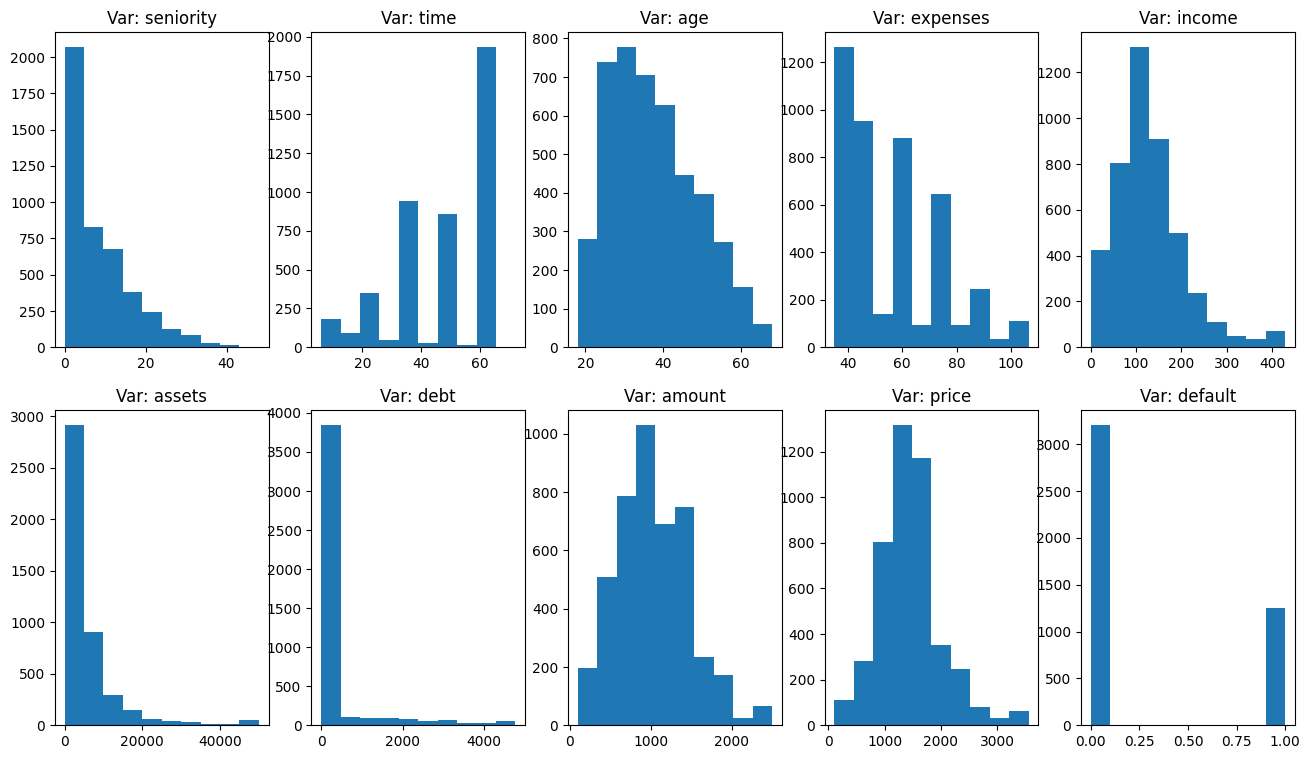

In [ ]:
# numerics = t_desc_num.columns

fig, ax = plt.subplots(2, 5, figsize=(16, 9))
i = 0

for row in range(2):
    for col in range(5):
        var = numerics[i]
        ax[row, col].hist(data[var], bins=10)
        ax[row, col].set_title(f'Var: {var}')
        i += 1

# plt.tight_layout()
plt.show()


Distribuciones Observadas:
- seniority: Sesgada a la derecha (muchos valores bajos, pocos valores altos).
- time: Distribución discreta con valores específicos dominantes.
- age: Distribución aproximadamente normal.
- expenses: Sesgada a la derecha con valores concentrados en la parte baja.
- income: Similar a 'expenses', con mayoría en valores más bajos.
- assets: Altamente sesgada, con pocos valores muy grandes.
- debt: La mayoría de los datos están cerca de cero.
- amount y price: Distribuciones aproximadamente normales.
- default: Desbalanceada, con más valores en 0 (no incumplimiento).

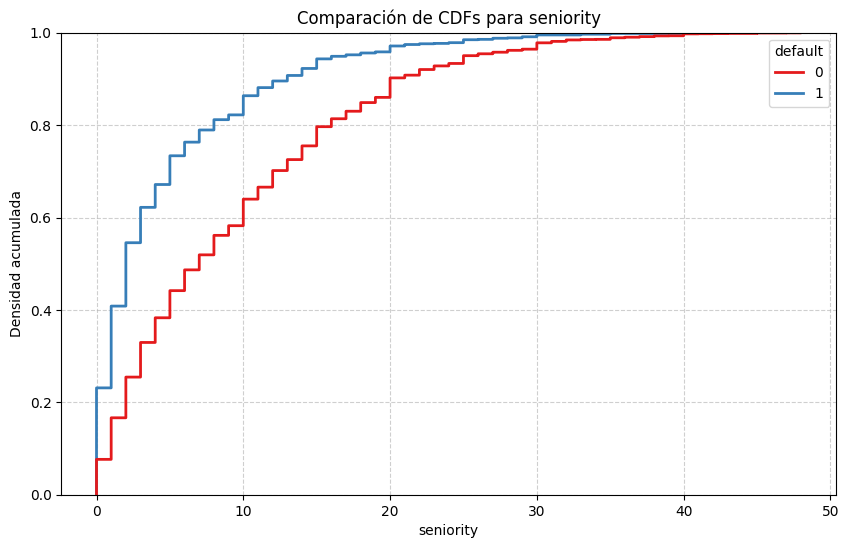

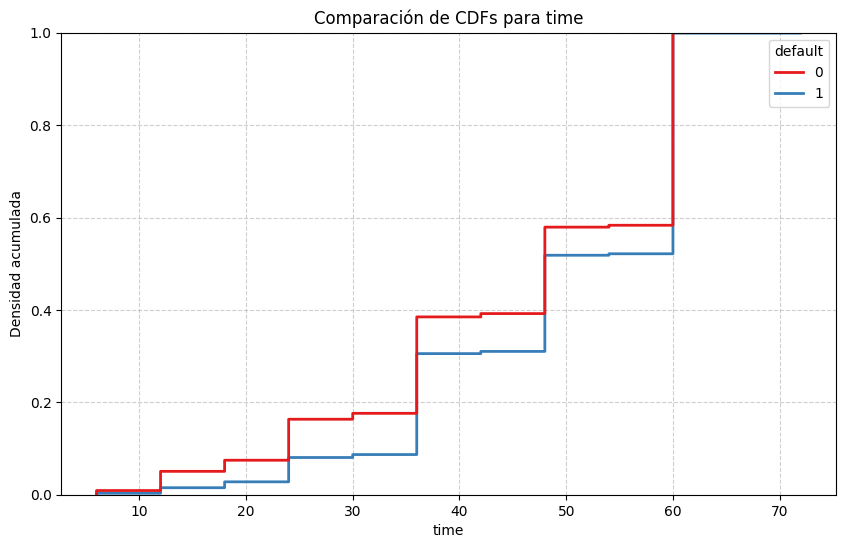

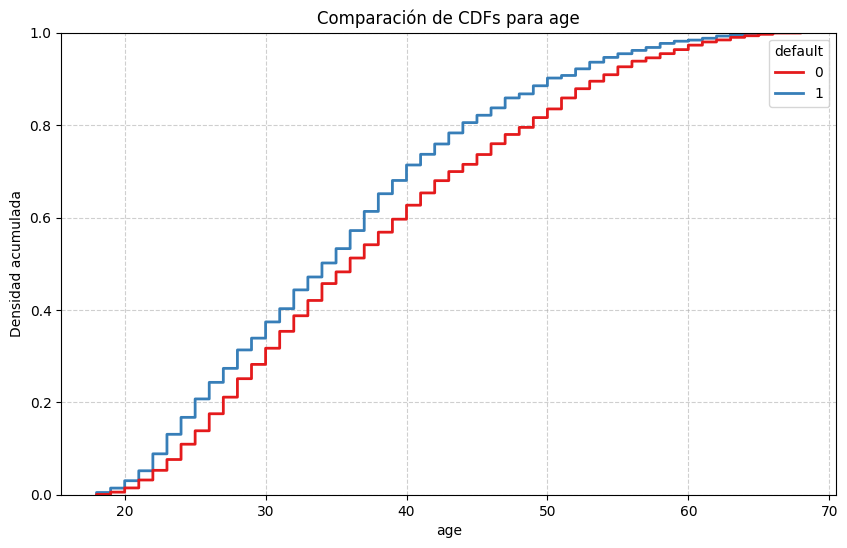

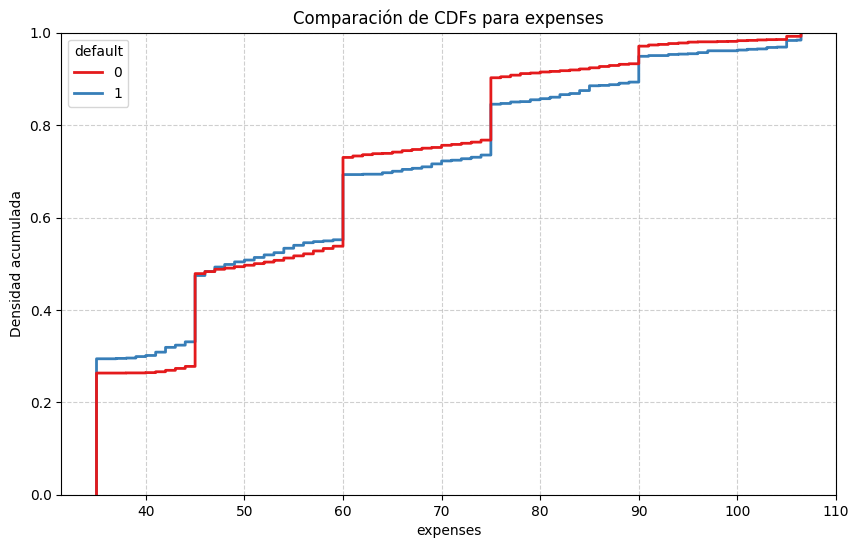

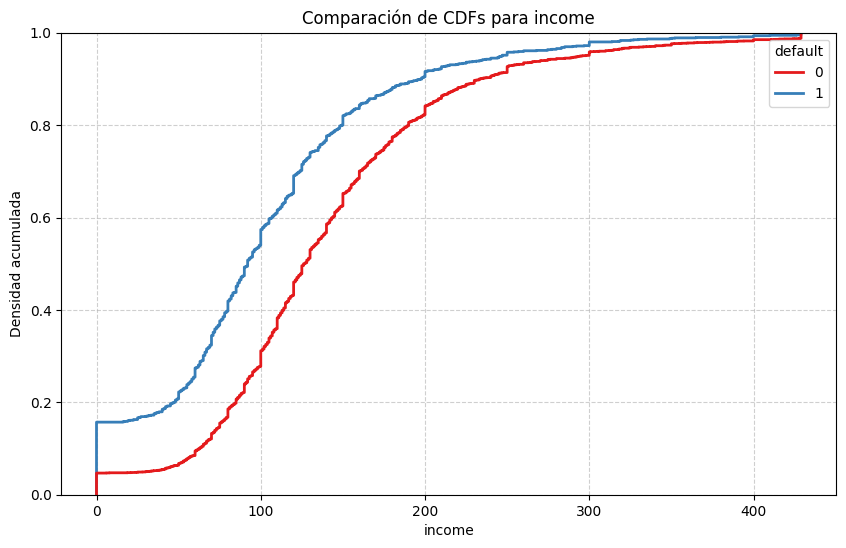

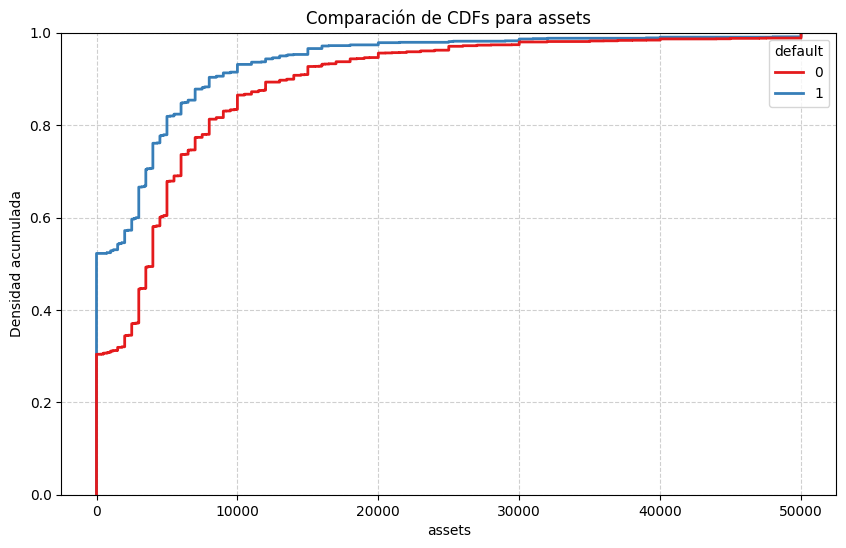

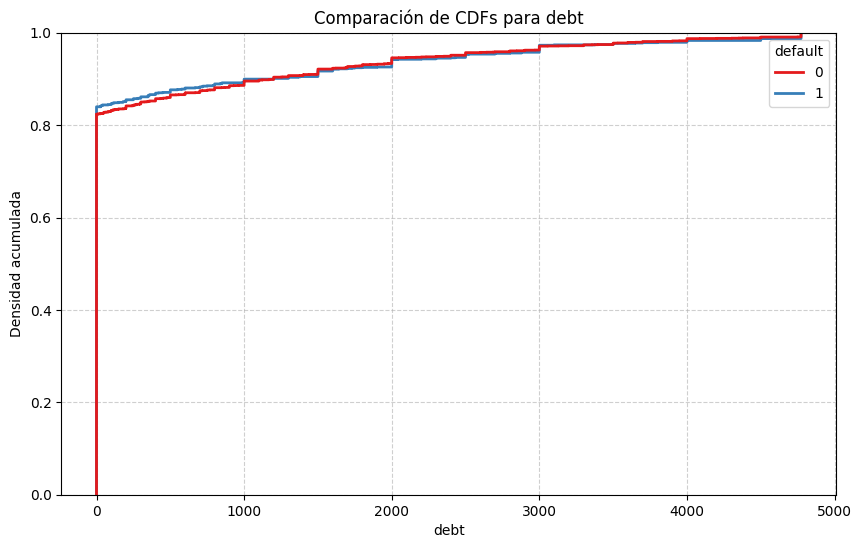

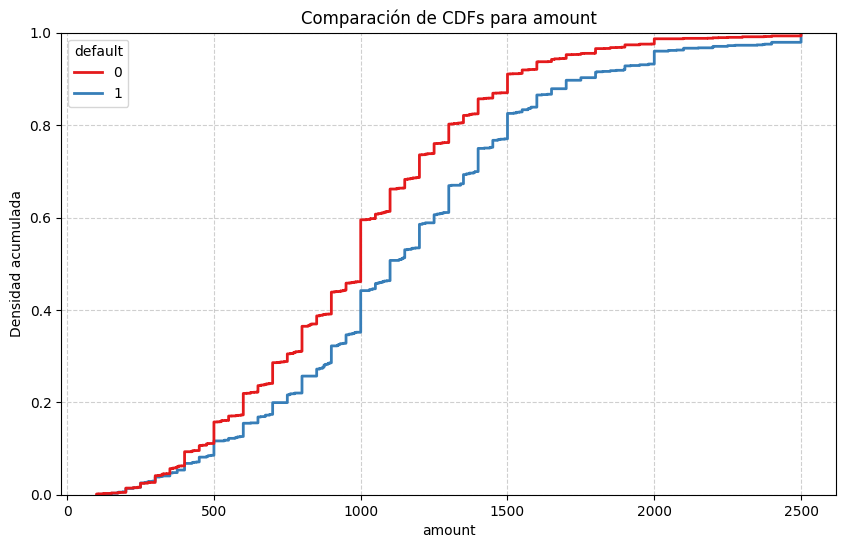

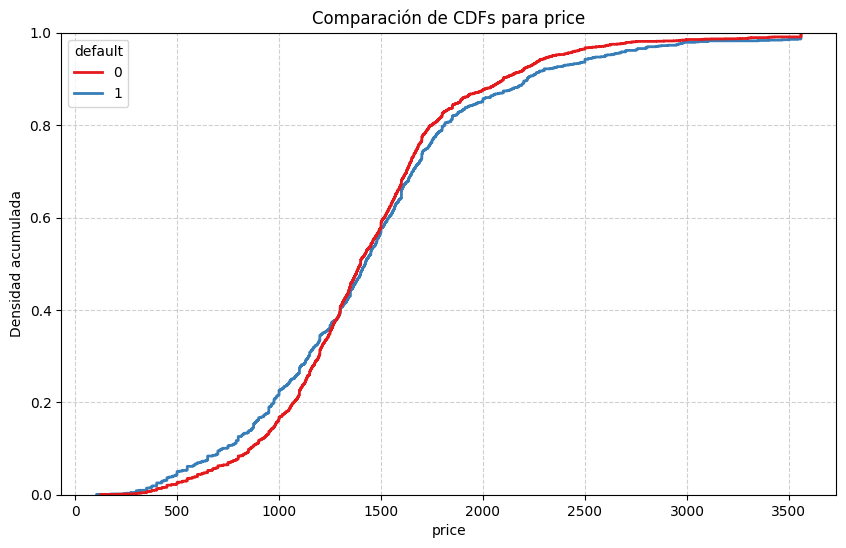

In [ ]:
# numerics = t_desc_num.columns

# Lista de columnas numéricas
# num_cols = ['seniority', 'time', 'age', 'expenses', 'income',
#             'assets', 'debt', 'amount', 'price']

# Graficar la distribución acumulada para cada variable
for col in numerics.drop('default'):
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data=data, x=col, hue='default', palette='Set1', linewidth=2)
    plt.title(f'Comparación de CDFs para {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Densidad acumulada')
    plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una cuadrícula ligera
    plt.show()


1. seniority (Antigüedad en el trabajo)
  - Los clientes con mayor antigüedad en el trabajo tienen menor probabilidad de ser morosos.
2. time (Plazo del préstamo en meses)
  - El plazo del préstamo (time) no parece ser un factor clave para determinar si un cliente será moroso o no.
3. age (Edad del solicitante)
  - Los clientes más jóvenes tienen mayor tendencia a incumplir pagos en comparación con los mayores.
4. expenses (Gastos mensuales reportados)
  - Los gastos mensuales no parecen ser un predictor fuerte de la morosidad, ya que la diferencia entre ambas distribuciones es pequeña.
5. income (Ingresos mensuales del solicitante)
  - Los clientes con ingresos más bajos tienen una mayor probabilidad de estar en mora, mientras que aquellos con ingresos más altos tienen menor riesgo de incumplimiento.
6. assets (Valor de los ahorros o activos)
  - Clientes con menores activos tienen mayor probabilidad de incumplimiento
  - Clientes con activos elevados tienen una menor probabilidad de incumplir, lo que sugiere que los ahorros o inversiones pueden ser un factor de estabilidad financiera.
7. debt (Obligaciones financieras actuales)
  - No hay una relación clara entre el nivel de deuda y la mora.
8. amount (Monto solicitado en el préstamo)
  - Los clientes morosos tienden a solicitar montos más altos.
9. price (Prima o valor total a devolver por el crédito)
  - El valor total del crédito (price) no parece ser un factor diferenciador fuerte para la mora.

## 2.2 Datos Cualitativos

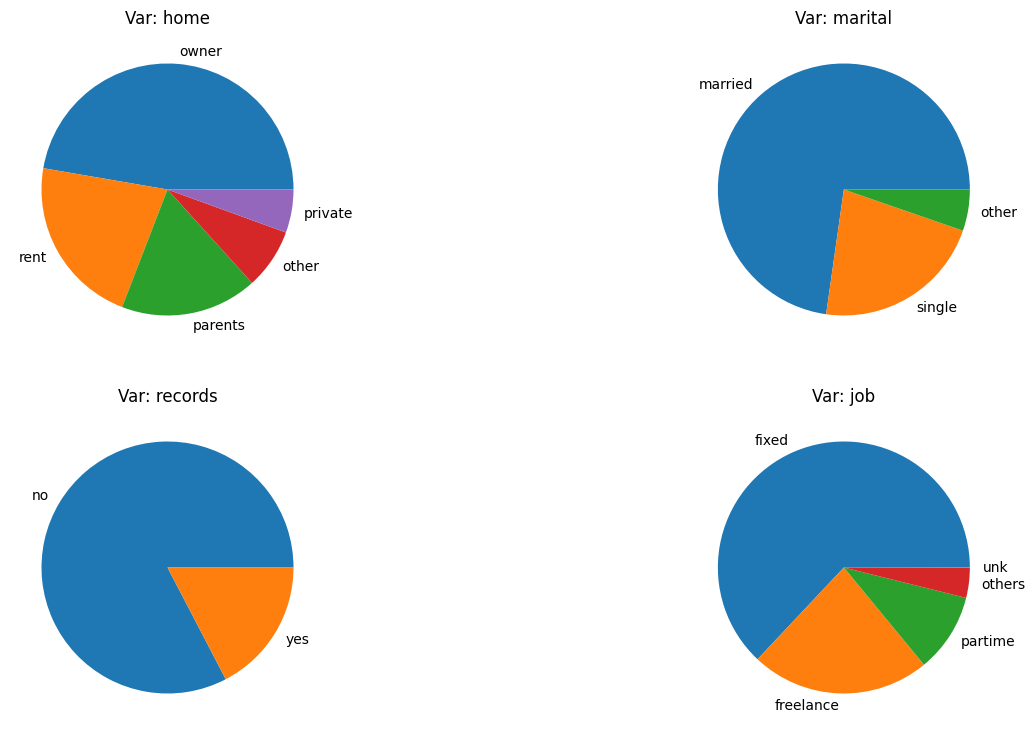

In [ ]:
cualis = data.select_dtypes('object').columns
fig, ax = plt.subplots(2, 2, figsize=(16,9))
i = 0
for row in range(2):
  for col in range(2):
    ax[row, col].pie(data[cualis[i]].value_counts().values, labels=data[cualis[i]].value_counts().index)
    ax[row, col].set_title('Var: ' + cualis[i])
    i +=1

plt.show()

- La mayoría son propietarios (owner) y una proporción menor vive en alquiler (rent)..
- La mayoría están casados (married) y los solteros (single) representan una parte menor.
- La mayoría no tienen registros financieros (no), mientras que un porcentaje más pequeño tiene registros de incumplimiento.
- La mayoría tienen empleo fijo (fixed) y un grupo menor trabaja como freelancers.

## 2.3 Contribución al riesgo

In [ ]:
data.select_dtypes(include=['object']).columns
global_risk = data['default'].mean()
# global_risk

data.groupby('home')['default'].mean()

,default
home,
other,0.460870
owner,0.185097
parents,0.297573
private,0.340081
rent,0.398767


In [ ]:
grouped = data.groupby('home')['default'].mean()
risk_ratio = grouped / global_risk
risk_ratio

,default
home,
other,1.637300
owner,0.657582
parents,1.057169
private,1.208182
rent,1.416671


In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns

def risk_analysis(column):
  global_risk = data['default'].mean()
  grouped = data.groupby(column)['default'].mean()
  risk_ratio = grouped / global_risk
  return pd.DataFrame({'Risk':grouped, 'Risk Ratio':risk_ratio})

for col in cat_cols:
  print(risk_analysis(col))

             Risk  Risk Ratio
home                         
other    0.460870    1.637300
owner    0.185097    0.657582
parents  0.297573    1.057169
private  0.340081    1.208182
rent     0.398767    1.416671
             Risk  Risk Ratio
marital                      
married  0.255785    0.908711
other    0.411017    1.460192
single   0.335378    1.191476
             Risk  Risk Ratio
records                      
no       0.224063    0.796013
yes      0.554981    1.971642
               Risk  Risk Ratio
job                            
fixed      0.206700    0.734329
freelance  0.325195    1.155299
others     0.397661    1.412742
partime    0.599558    2.130007
unk        1.000000    3.552632


<ipython-input-43-5458be8e3c24>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Risk Ratio', data=risk_df, palette='coolwarm', alpha=0.9)


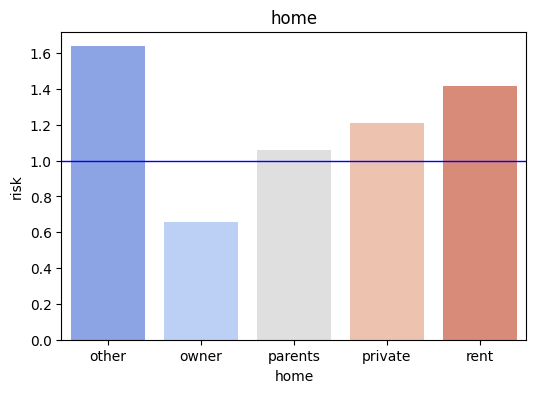

<ipython-input-43-5458be8e3c24>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Risk Ratio', data=risk_df, palette='coolwarm', alpha=0.9)


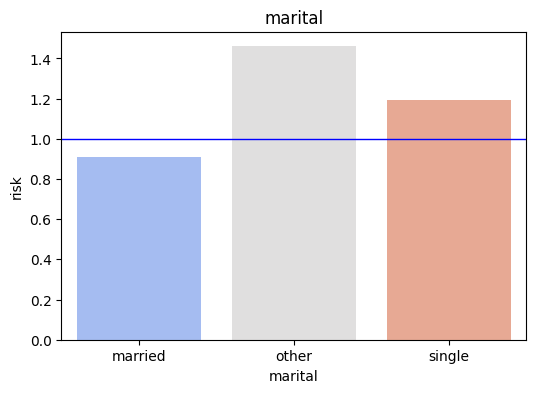

<ipython-input-43-5458be8e3c24>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Risk Ratio', data=risk_df, palette='coolwarm', alpha=0.9)


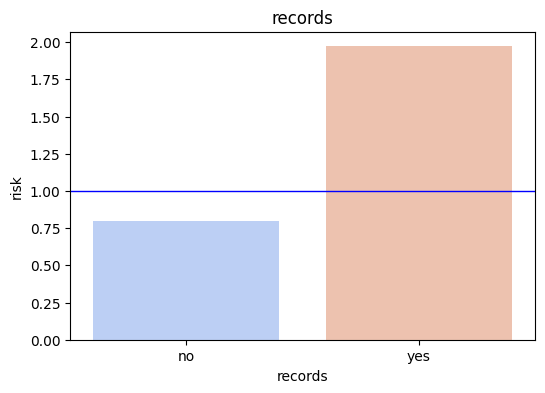

<ipython-input-43-5458be8e3c24>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Risk Ratio', data=risk_df, palette='coolwarm', alpha=0.9)


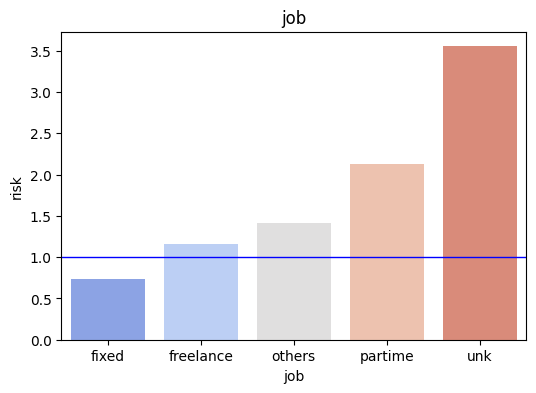

In [ ]:
# Seleccionamos las variables categóricas
cualis = data.select_dtypes(['object']).columns
global_mean = data['default'].mean()

for col in cualis:
  plt.figure(figsize=(6,4))

  # Calculamos el riesgo promedio y el riesgo relativo
  risk_df = data.groupby(col)["default"].mean().reset_index()
  risk_df["Risk Ratio"] = risk_df['default'] / global_mean

  # Creamos el gráfico de barras con risk_ratio
  sns.barplot(x=col, y='Risk Ratio', data=risk_df, palette='coolwarm', alpha=0.9)

  # Agregamos la línea horizontal en 1 (valor neutro de riesgo)
  plt.axhline(1, color='blue', linestyle='-', linewidth=1)

  # Etiquetas y título
  plt.ylabel('risk')
  plt.xlabel(col)
  plt.title(f"{col}")

  plt.show()

- Los propietarios (owner) tienen el menor riesgo de incumplimiento.
- Las personas casadas tienen menor riesgo financiero.
- Tener registros negativos aumenta drásticamente el riesgo de incumplimiento (casi el doble del promedio).
- Las personas con trabajo fijo son las menos propensas a incumplir.

#**3. Construcción de Modelos**


---

## 3.1 Partición de datos

In [ ]:
data.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800.0,846.0,0
1,17,rent,60,58,other,no,fixed,48.0,131.0,0.0,0.0,1000.0,1658.0,0
2,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000.0,2985.0,1
3,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900.0,1325.0,0
4,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,310.0,910.0,0


In [ ]:
# Partición de datos
X = data.drop(columns=['default'])
X = pd.get_dummies(X)  # Codificación one-hot
y = data['default']

In [ ]:
# Seleccionar las columnas de tipo booleano
booblean_columns = X.select_dtypes(include='bool').columns
booblean_columns

# Convertir las columnas booleanas a enteros
X[booblean_columns] = X[booblean_columns].astype(int)

In [ ]:
X.head()

,seniority,time,age,expenses,income,assets,debt,amount,price,home_other,...,marital_married,marital_other,marital_single,records_no,records_yes,job_fixed,job_freelance,job_others,job_partime,job_unk
0,9,60,30,73.0,129.0,0.0,0.0,800.0,846.0,0,...,1,0,0,1,0,0,1,0,0,0
1,17,60,58,48.0,131.0,0.0,0.0,1000.0,1658.0,0,...,0,1,0,1,0,1,0,0,0,0
2,10,36,46,90.0,200.0,3000.0,0.0,2000.0,2985.0,0,...,1,0,0,0,1,0,1,0,0,0
3,0,60,24,63.0,182.0,2500.0,0.0,900.0,1325.0,0,...,0,0,1,1,0,1,0,0,0,0
4,0,36,26,46.0,107.0,0.0,0.0,310.0,910.0,0,...,0,0,1,1,0,1,0,0,0,0


In [ ]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3.2 Modelos de clasificación

### Modelo logit

#### Ajustar modelo

In [ ]:
# Ajustamos el modelo de regresión logística
reg_logit = LogisticRegression(max_iter=1000, random_state=42)
reg_logit.fit(X_train, y_train)

# Mostramos el modelo ajustado
reg_logit

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

#### Predicción inicial

In [ ]:
# Realiza la predicción en el conjunto de prueba
clas_logit = reg_logit.predict(X_test)

In [ ]:
# Creamos la matriz de confusión
pd.crosstab(y_test, clas_logit,margins=True)

col_0,0,1,All
default,,,
0,882,63,945
1,201,191,392
All,1083,254,1337


In [ ]:
# Generamos el reporte de clasificación
print(classification_report(y_test, clas_logit))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       945
           1       0.75      0.49      0.59       392

    accuracy                           0.80      1337
   macro avg       0.78      0.71      0.73      1337
weighted avg       0.80      0.80      0.79      1337



#### Curva ROC

In [ ]:
# Predicción de probabilidades
y_pred_proba = reg_logit.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva (default)

In [ ]:
# Calculamos el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8414291113270704


AUC-ROC = 0.84, lo que indica un modelo relativamente bueno

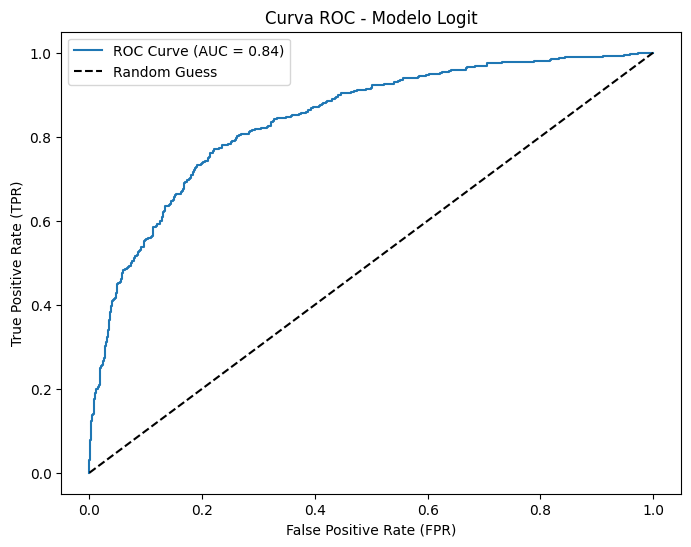

In [ ]:
# Calcula FPR, TPR y umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Gráfico la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Modelo Logit')
plt.legend()
plt.show()

In [ ]:
# Cálculo del índice de Youden
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f'Punto óptimo de corte: {optimal_threshold}')

Punto óptimo de corte: 0.2639122272493754


- Significa que, según el índice de Youden, el umbral óptimo para clasificar a un cliente como moroso (default = 1) es aproximadamente 0.26.
- Si la probabilidad de default estimada por el modelo es mayor o igual a 0.26, el cliente se clasifica como moroso.
- Si es menor a 0.26, se clasifica como no moroso.

In [ ]:
# Clasificar utilizando el umbral óptimo
clas_logit2 = (y_pred_proba >= optimal_threshold).astype(int)

# Creamos la matriz de confusión
conf_matrix = pd.crosstab(y_test, clas_logit2, margins=True, margins_name="Total")
# print("Matriz de Confusión:")
# print(conf_matrix)
conf_matrix

col_0,0,1,Total
default,,,
0,737,208,945
1,90,302,392
Total,827,510,1337


In [ ]:
# Generamos el reporte de clasificación
# print("\nReporte de Clasificación:")
print(classification_report(y_test, clas_logit2))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       945
           1       0.59      0.77      0.67       392

    accuracy                           0.78      1337
   macro avg       0.74      0.78      0.75      1337
weighted avg       0.80      0.78      0.78      1337



- Con el umbral de 0.26, el recall para los clientes morosos pasó de 49% a 77%, lo que significa que el modelo detecta mejor a los clientes con alto riesgo de incumplimiento.
- La precisión para los clientes no morosos pasó de 81% a 89%, indicando que hay menos falsos positivos (menos clientes buenos siendo marcados erróneamente como morosos).

#### score

In [ ]:
data

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800.0,846.0,0
1,17,rent,60,58,other,no,fixed,48.0,131.0,0.0,0.0,1000.0,1658.0,0
2,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000.0,2985.0,1
3,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900.0,1325.0,0
4,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,310.0,910.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,1,rent,60,39,married,no,fixed,69.0,92.0,0.0,0.0,900.0,1020.0,1
4451,22,owner,60,46,married,no,fixed,60.0,75.0,3000.0,600.0,950.0,1263.0,0
4452,0,owner,24,37,married,no,partime,60.0,90.0,3500.0,0.0,500.0,963.0,1
4453,0,rent,48,23,single,no,freelance,49.0,140.0,0.0,0.0,550.0,550.0,0


In [ ]:
reg_logit.predict_proba(X) ## tomo ambas las clases

array([[0.69770775, 0.30229225],
       [0.9007938 , 0.0992062 ],
       [0.42117609, 0.57882391],
       ...,
       [0.66401555, 0.33598445],
       [0.57666383, 0.42333617],
       [0.71381023, 0.28618977]])

In [ ]:
# Cálculo del score (probabilidad de ser un buen cliente)
reg_logit.predict_proba(X)[:, 0]

array([0.69770775, 0.9007938 , 0.42117609, ..., 0.66401555, 0.57666383,
       0.71381023])

In [ ]:
# data['score_logit'] = reg_logit.predict_proba(X)[:, 0]
# data

In [ ]:
# Cálculo del score (probabilidad de ser un buen cliente)
data['score_logit'] = reg_logit.predict_proba(X)[:, 0]

# data['score_logit'] = reg_logit.predict_proba(X)[:, 1]  # Probabilidad de default

data['score_scaled'] = data['score_logit'] * 1000 ### Ajusto a el score
data

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default,score_logit,score_scaled
0,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800.0,846.0,0,0.697708,697.707755
1,17,rent,60,58,other,no,fixed,48.0,131.0,0.0,0.0,1000.0,1658.0,0,0.900794,900.793799
2,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000.0,2985.0,1,0.421176,421.176091
3,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900.0,1325.0,0,0.768557,768.556777
4,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,310.0,910.0,0,0.817655,817.655407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,1,rent,60,39,married,no,fixed,69.0,92.0,0.0,0.0,900.0,1020.0,1,0.551398,551.398023
4451,22,owner,60,46,married,no,fixed,60.0,75.0,3000.0,600.0,950.0,1263.0,0,0.952753,952.752712
4452,0,owner,24,37,married,no,partime,60.0,90.0,3500.0,0.0,500.0,963.0,1,0.664016,664.015548
4453,0,rent,48,23,single,no,freelance,49.0,140.0,0.0,0.0,550.0,550.0,0,0.576664,576.663832


<ipython-input-64-20ccb29f0b31>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').sum(axis=1)
<ipython-input-64-20ccb29f0b31>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').plot(kind='bar',stacked=True,ax=ax[0])
<ipython-input-64-20ccb29f0b31>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='ra

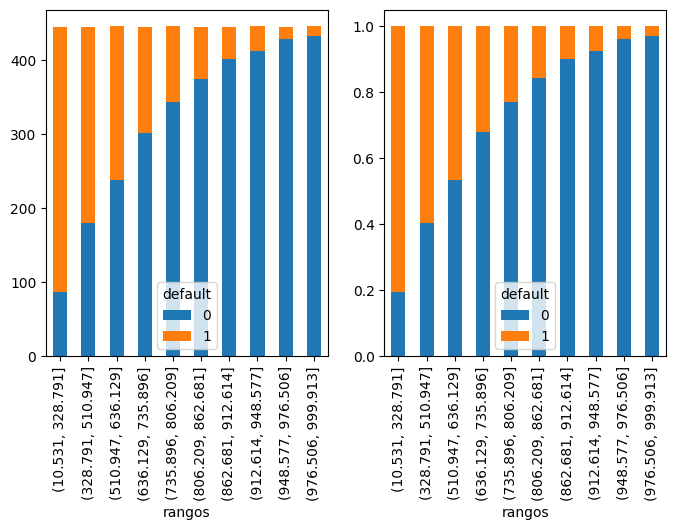

In [ ]:
def hist_fill_p(y_test,scaled_scores,bins=10):
    fig, ax = plt.subplots(1,2,figsize=(8,4.5))
    bins = np.percentile(scaled_scores, np.arange(0, 100.1, 10))
    rangos = pd.cut(scaled_scores,bins=bins, duplicates='drop')
    df_hist = pd.DataFrame({'score':scaled_scores,'default':y_test,'rangos':rangos})
    row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').sum(axis=1)
    df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').plot(kind='bar',stacked=True,ax=ax[0])
    df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').div(row_sums, axis=0).plot(kind='bar',stacked=True,ax=ax[1])

    plt.show()

# qui y_test es el valor verdadero obtenido en la particion de datos
# scaled_scores son las probabilidades de ser buen cliente en la escala de 0 a 1000, es decir multiplicandolo por x1000
hist_fill_p(data['default'], data['score_scaled'], bins=10)

- En los rangos más bajos de score (izquierda), la proporción de clientes morosos (1) es más alta.
- En los rangos más altos de score (derecha), la mayoría son no morosos (0), lo que confirma que el modelo está capturando bien el riesgo de crédito.
- Hay un rango intermedio donde todavía hay una mezcla de morosos y no morosos.

Por lo tanto, este modelo **logit** logra segmentar bien a los clientes en función del riesgo de crédito.

### Modelo Árbol

#### Ajustar modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Ajustamos el modelo de Árbol de Decisión
reg_tree = DecisionTreeClassifier(max_depth=5, random_state=42)  # Ajustamos el modelo con una profundidad máxima de 5
reg_tree.fit(X_train, y_train)
reg_tree

DecisionTreeClassifier(max_depth=5, random_state=42)

#### Predicción inicial

In [ ]:
# Predicción inicial
clas_tree = reg_tree.predict(X_test)

In [ ]:
# Matriz de confusión
pd.crosstab(y_test, clas_tree,margins=True)

col_0,0,1,All
default,,,
0,848,97,945
1,215,177,392
All,1063,274,1337


In [ ]:
# Reporte de clasificación
print(classification_report(y_test, clas_tree))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       945
           1       0.65      0.45      0.53       392

    accuracy                           0.77      1337
   macro avg       0.72      0.67      0.69      1337
weighted avg       0.75      0.77      0.75      1337



#### Curva ROC

In [ ]:
# Predicción de probabilidades
y_pred_proba_tree = reg_tree.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva (default)

In [ ]:
# Calculamos el AUC-ROC
auc_roc_tree = roc_auc_score(y_test, y_pred_proba_tree)
print(f'AUC-ROC: {auc_roc_tree}')

AUC-ROC: 0.7816110571212613


Un AUC-ROC de 0.78 indica que el modelo tiene un buen desempeño, aunque no es perfecto.

In [ ]:
# Calcula FPR, TPR y umbrales
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_proba_tree)

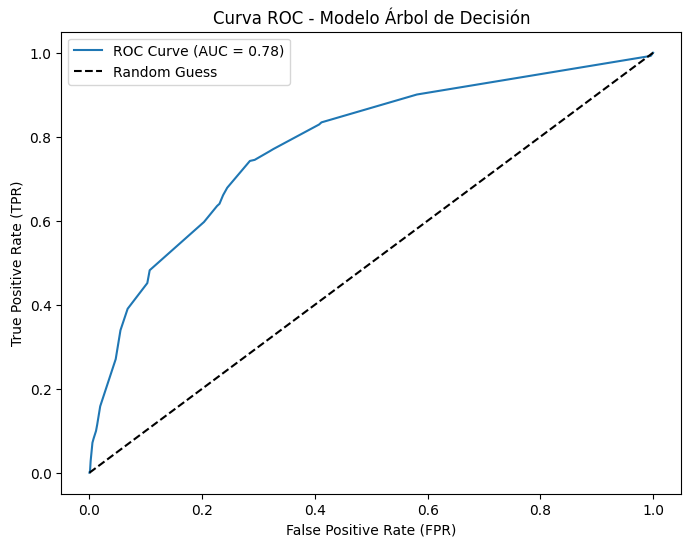

In [ ]:
# Gráfico la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'ROC Curve (AUC = {auc_roc_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Modelo Árbol de Decisión')
plt.legend()
plt.show()

In [ ]:
# Cálculo del índice de Youden
youden_index_tree = tpr_tree - fpr_tree
optimal_idx_tree = np.argmax(youden_index_tree)
optimal_threshold_tree = thresholds_tree[optimal_idx_tree]

print(f'Punto óptimo de corte: {optimal_threshold_tree}')

Punto óptimo de corte: 0.26595744680851063


- Si la probabilidad de default que predice el modelo para un cliente es mayor o igual a 0.2659, se clasifica como moroso (1).
- Si la probabilidad es menor, se clasifica como no moroso (0).

In [ ]:
# Clasificar utilizando el umbral óptimo
clas_tree2 = (y_pred_proba_tree >= optimal_threshold_tree).astype(int)

# Matriz de confusión con el umbral óptimo
pd.crosstab(y_test, clas_tree2,margins=True)

col_0,0,1,All
default,,,
0,676,269,945
1,101,291,392
All,777,560,1337


In [ ]:
# Reporte de clasificación con el umbral óptimo
print(classification_report(y_test, clas_tree2))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       945
           1       0.52      0.74      0.61       392

    accuracy                           0.72      1337
   macro avg       0.69      0.73      0.70      1337
weighted avg       0.77      0.72      0.73      1337



- El nuevo umbral mejora la detección de morosos (recall 74%)
- Aumentan los falsos positivos (personas clasificadas como morosas que en realidad no lo son)
- El recall de la clase 1 mejora significativamente (45% → 74%), lo que significa que se identifican más clientes morosos correctamente.

#### score

In [ ]:
# Cálculo del score (probabilidad de no default)
data['score_tree'] = reg_tree.predict_proba(X)[:, 0]  # Probabilidad de no default

# Escalamos el score a un rango de 0 a 1000
data['score_scaled_tree'] = data['score_tree'] * 1000

data

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default,score_logit,score_scaled,score_tree,score_scaled_tree
0,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800.0,846.0,0,0.697708,697.707755,0.879397,879.396985
1,17,rent,60,58,other,no,fixed,48.0,131.0,0.0,0.0,1000.0,1658.0,0,0.900794,900.793799,0.879397,879.396985
2,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000.0,2985.0,1,0.421176,421.176091,0.734043,734.042553
3,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900.0,1325.0,0,0.768557,768.556777,0.853211,853.211009
4,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,310.0,910.0,0,0.817655,817.655407,0.669872,669.871795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,1,rent,60,39,married,no,fixed,69.0,92.0,0.0,0.0,900.0,1020.0,1,0.551398,551.398023,0.669872,669.871795
4451,22,owner,60,46,married,no,fixed,60.0,75.0,3000.0,600.0,950.0,1263.0,0,0.952753,952.752712,0.941111,941.111111
4452,0,owner,24,37,married,no,partime,60.0,90.0,3500.0,0.0,500.0,963.0,1,0.664016,664.015548,0.696970,696.969697
4453,0,rent,48,23,single,no,freelance,49.0,140.0,0.0,0.0,550.0,550.0,0,0.576664,576.663832,0.853211,853.211009


In [ ]:
def hist_fill_p(y_test, scaled_scores, bins=10):

    # Crea bins basados en percentiles
    bins = np.percentile(scaled_scores, np.arange(0, 100.1, 10))

    # Crea rangos basados en los bins
    rangos = pd.cut(scaled_scores, bins=bins, duplicates='drop')

    # Crea un DataFrame con los scores, default y rangos
    df_hist = pd.DataFrame({'score': scaled_scores, 'default': y_test, 'rangos': rangos})

    # Calcula las sumas de filas para normalizar
    row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count').sum(axis=1)

    # Crea la figura y los subplots
    fig, ax = plt.subplots(1, 2, figsize=(8, 4.5))

    # Gráfico 1: Conteo absoluto de defaults y no defaults por rango de score
    df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count').plot(
        kind='bar', stacked=True, ax=ax[0]
    )

    # Gráfico 2: Porcentaje de defaults y no defaults por rango de score
    df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count').div(
        row_sums, axis=0
    ).plot(kind='bar', stacked=True, ax=ax[1])

    # Mostrar la figura
    plt.show()

<ipython-input-78-97d3e986cb6f>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count').sum(axis=1)
<ipython-input-78-97d3e986cb6f>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count').plot(
<ipython-input-78-97d3e986cb6f>:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='rangos', columns='default', va

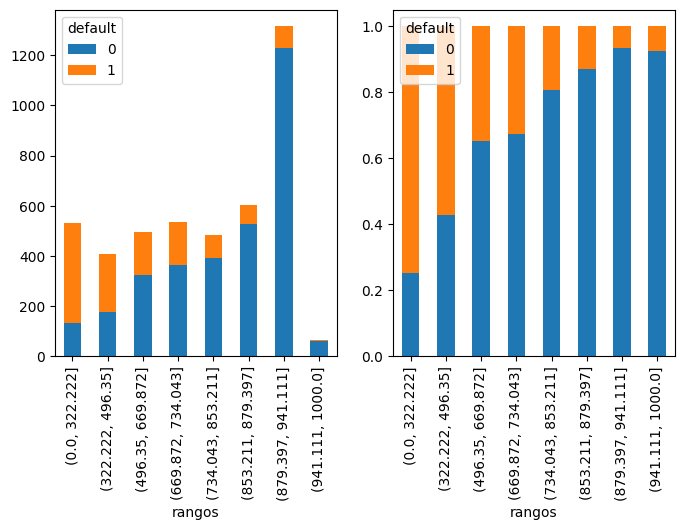

In [ ]:
# Llamar a la función para visualizar el score del modelo de Árbol de Decisión
hist_fill_p(data['default'], data['score_scaled_tree'])

- Scores bajos están asociados con una mayor probabilidad de default.
- Scores altos están asociados con clientes menos propensos al default.
- La cantidad de clientes no morosos es mucho mayor en los scores altos.
- En los scores bajos, hay una mezcla más equilibrada entre morosos y no morosos.


### Modelo Random Forest

#### Ajustar modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
reg_forest = RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)
reg_forest.fit(X_train, y_train)
reg_forest

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

#### Predicción inicial

In [ ]:
# Predicción inicial
clas_forest = reg_forest.predict(X_test)

In [ ]:
# Matriz de confusión
pd.crosstab(y_test, clas_forest,margins=True)

col_0,0,1,All
default,,,
0,899,46,945
1,245,147,392
All,1144,193,1337


In [ ]:
# Reporte de clasificación
print(classification_report(y_test, clas_forest))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       945
           1       0.76      0.38      0.50       392

    accuracy                           0.78      1337
   macro avg       0.77      0.66      0.68      1337
weighted avg       0.78      0.78      0.76      1337



#### Curva ROC

In [ ]:
# Predicción de probabilidades
y_pred_proba = reg_forest.predict_proba(X_test)[:, 1]

In [ ]:
# Calculamos el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8413319295972357


El modelo tiene un buen desempeño general, ya que un AUC-ROC de 0.84 indica que el modelo distingue bien entre morosos y no morosos.

In [ ]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

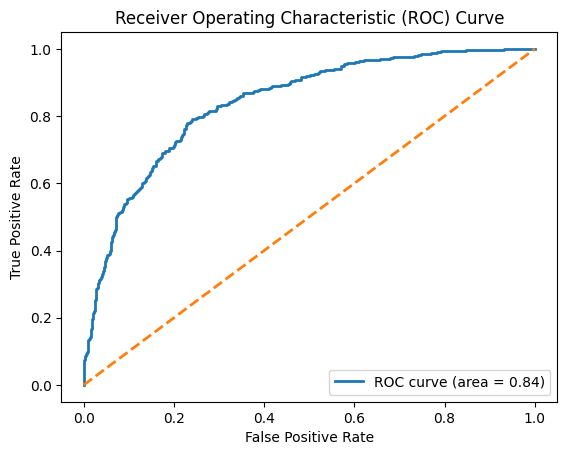

In [ ]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Encontrar el umbral óptimo
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Punto óptimo de corte: {optimal_threshold}')

Punto óptimo de corte: 0.270509014782932


In [ ]:
# Aplicar el punto óptimo de corte
clas_forest2 = (y_pred_proba > optimal_threshold).astype(int)

# Matriz de confusión con el punto óptimo
pd.crosstab(y_test, clas_forest2,margins=True)

col_0,0,1,All
default,,,
0,718,227,945
1,83,309,392
All,801,536,1337


In [ ]:
# Reporte de clasificación con el punto óptimo
print(classification_report(y_test, clas_forest2))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       945
           1       0.58      0.79      0.67       392

    accuracy                           0.77      1337
   macro avg       0.74      0.77      0.74      1337
weighted avg       0.80      0.77      0.78      1337



- Aumento del recall: Pasó de 38% a 79%, lo que significa que ahora identificamos más clientes en riesgo de incumplimiento.
- Disminución de la precisión en morosos: Bajó de 76% a 58%, lo que significa que ahora hay más falsos positivos (clientes buenos clasificados como morosos).
- Impacto en la clase de buenos pagadores (0): Su recall bajó de 95% a 76%, lo que indica que estamos sacrificando algunos clientes buenos en favor de detectar más morosos.

#### score

In [ ]:
# Cálculo del score (probabilidad de no default)
data['score_forest'] = reg_forest.predict_proba(X)[:, 0]  # Probabilidad de no default

# Escalamos el score a un rango de 0 a 1000
data['score_scaled_forest'] = data['score_forest'] * 1000

data

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default,score_logit,score_scaled,score_tree,score_scaled_tree,score_forest,score_scaled_forest
0,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800.0,846.0,0,0.697708,697.707755,0.879397,879.396985,0.801306,801.305584
1,17,rent,60,58,other,no,fixed,48.0,131.0,0.0,0.0,1000.0,1658.0,0,0.900794,900.793799,0.879397,879.396985,0.861578,861.577979
2,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000.0,2985.0,1,0.421176,421.176091,0.734043,734.042553,0.573225,573.225030
3,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900.0,1325.0,0,0.768557,768.556777,0.853211,853.211009,0.806239,806.238968
4,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,310.0,910.0,0,0.817655,817.655407,0.669872,669.871795,0.737936,737.935985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,1,rent,60,39,married,no,fixed,69.0,92.0,0.0,0.0,900.0,1020.0,1,0.551398,551.398023,0.669872,669.871795,0.702881,702.880763
4451,22,owner,60,46,married,no,fixed,60.0,75.0,3000.0,600.0,950.0,1263.0,0,0.952753,952.752712,0.941111,941.111111,0.821875,821.875198
4452,0,owner,24,37,married,no,partime,60.0,90.0,3500.0,0.0,500.0,963.0,1,0.664016,664.015548,0.696970,696.969697,0.563258,563.258026
4453,0,rent,48,23,single,no,freelance,49.0,140.0,0.0,0.0,550.0,550.0,0,0.576664,576.663832,0.853211,853.211009,0.615443,615.442782


In [ ]:
def hist_fill_p(y_test, scaled_scores, bins=10):

    # Crea bins basados en percentiles
    bins = np.percentile(scaled_scores, np.arange(0, 100.1, 10))

    # Crea rangos basados en los bins
    rangos = pd.cut(scaled_scores, bins=bins, duplicates='drop')

    # Crea un DataFrame con los scores, default y rangos
    df_hist = pd.DataFrame({'score': scaled_scores, 'default': y_test, 'rangos': rangos})

    # Calcula las sumas de filas para normalizar
    row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count').sum(axis=1)

    # Crea la figura y los subplots
    fig, ax = plt.subplots(1, 2, figsize=(8, 4.5))

    # Gráfico 1: Conteo absoluto de defaults y no defaults por rango de score
    df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count').plot(
        kind='bar', stacked=True, ax=ax[0]
    )

    # Gráfico 2: Porcentaje de defaults y no defaults por rango de score
    df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count').div(
        row_sums, axis=0
    ).plot(kind='bar', stacked=True, ax=ax[1])

    # Mostrar la figura
    plt.show()

<ipython-input-93-97d3e986cb6f>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count').sum(axis=1)
<ipython-input-93-97d3e986cb6f>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='rangos', columns='default', values='score', aggfunc='count').plot(
<ipython-input-93-97d3e986cb6f>:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='rangos', columns='default', va

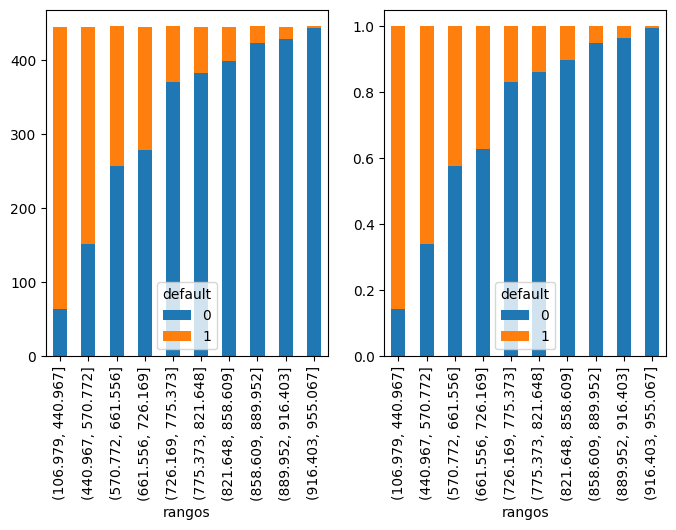

In [ ]:
hist_fill_p(data['default'],data['score_scaled_forest'])

- A medida que el score aumenta, la proporción de morosos (naranja) disminuye, lo que indica que el modelo asigna scores más altos a clientes con menor riesgo de default
- En los rangos más bajos de score, hay una mayor concentración de morosos, lo que sugiere que el modelo distingue bien entre clientes buenos y malos.

#**4. Evaluación y Selección del Modelo**


---

In [ ]:
print(classification_report(y_test, clas_logit2))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       945
           1       0.59      0.77      0.67       392

    accuracy                           0.78      1337
   macro avg       0.74      0.78      0.75      1337
weighted avg       0.80      0.78      0.78      1337



In [ ]:
print(classification_report(y_test, clas_tree2))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       945
           1       0.52      0.74      0.61       392

    accuracy                           0.72      1337
   macro avg       0.69      0.73      0.70      1337
weighted avg       0.77      0.72      0.73      1337



In [ ]:
print(classification_report(y_test, clas_forest2))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       945
           1       0.58      0.79      0.67       392

    accuracy                           0.77      1337
   macro avg       0.74      0.77      0.74      1337
weighted avg       0.80      0.77      0.78      1337



In [ ]:
perfil = X.iloc[0:1]
perfil

,seniority,time,age,expenses,income,assets,debt,amount,price,home_other,...,marital_married,marital_other,marital_single,records_no,records_yes,job_fixed,job_freelance,job_others,job_partime,job_unk
0,9,60,30,73.0,129.0,0.0,0.0,800.0,846.0,0,...,1,0,0,1,0,0,1,0,0,0


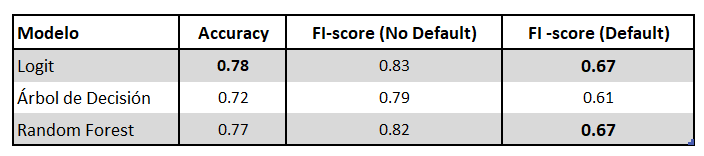

**Análisis de Resultados:**
- Regresión Logística y Random Forest son los mejores modelos, con métricas similares.
- Random Forest captura mejor a los morosos (recall = 0.79), pero tiene una ligera penalización en precisión.
- Árbol de Decisión es el menos preciso y tiene menor capacidad predictiva general.

#**5. Implementación del modelo**


---

## Crear el perfil de prueba

In [ ]:
def crear_fila_dataframe():
    # Diccionario base con todos los campos inicializados a cero
    datos = {
        'seniority': 0.0, 'time': 0.0, 'age': 0.0, 'expenses': 0.0,
        'income': 0.0, 'assets': 0.0, 'debt': 0.0, 'amount': 0.0,
        'price': 0.0, 'home_other': 0.0, 'home_owner': 0.0,
        'home_parents': 0.0, 'home_private': 0.0, 'home_rent': 0.0,
        'marital_married': 0.0, 'marital_other': 0.0, 'marital_single': 0.0,
        'records_no': 0.0, 'records_yes': 0.0, 'job_fixed': 0.0,
        'job_freelance': 0.0, 'job_others': 0.0, 'job_partime': 0.0,
        'job_unk': 0.0}
          # Rellenar los datos mediante input del usuario
    for campo in datos:
        valor = input(f"{campo} (actual: {datos[campo]}): ")
        if valor.strip():  # Si no está vacío, actualizar el valor
            datos[campo] = float(valor)

    # Crear DataFrame con una única fila
    df = pd.DataFrame([datos])
    return df

In [ ]:
# Uso de la función
df_usuario = crear_fila_dataframe()

seniority (actual: 0.0): 6000
time (actual: 0.0): 12
age (actual: 0.0): 35
expenses (actual: 0.0): 2000
income (actual: 0.0): 5000
assets (actual: 0.0): 
debt (actual: 0.0): 
amount (actual: 0.0): 
price (actual: 0.0): 
home_other (actual: 0.0): 0
home_owner (actual: 0.0): 0
home_parents (actual: 0.0): 1
home_private (actual: 0.0): 0
home_rent (actual: 0.0): 0
marital_married (actual: 0.0): 1
marital_other (actual: 0.0): 0
marital_single (actual: 0.0): 0
records_no (actual: 0.0): 0
records_yes (actual: 0.0): 0
job_fixed (actual: 0.0): 0
job_freelance (actual: 0.0): 0
job_others (actual: 0.0): 1
job_partime (actual: 0.0): 0
job_unk (actual: 0.0): 0


### Generamos una predicción

In [ ]:
# Generamos una predicción para el cliente
risk = reg_forest.predict_proba(df_usuario)[0][1]  # Probabilidad de default (clase 1)
print(f"Score del cliente {(1-risk)*1000:.0f}")

Score del cliente 658
